In [1]:
import json
import h5py
import numpy as np
import requests
import json
from matplotlib import pyplot as plt

# Load the prosepectivate sample

In [2]:
data_to_predict = '/home/wentao/UNet-MRI-Reconstruction/data/prospectiveSample.mat'

In [3]:
f = h5py.File(data_to_predict, 'r')

In [4]:
input_data = np.array(f.get('imagesRecon'))

In [5]:
input_data.shape

(10, 128, 128, 20)

# Convert the data into json format and send an API request

In [6]:
model = 'UNet2D2D'
API = "http://localhost:8501/v1/models/{model}:predict".format(model=model)
data = json.dumps({"instances": input_data.tolist()})
response = requests.post(API, data=data)

In [7]:
response.status_code

200

In [8]:
print("The average time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))

The average time taken for each image is 0.7131157s


In [9]:
prediction = np.array(response.json()['predictions'])

In [10]:
prediction.shape

(10, 128, 128, 20)

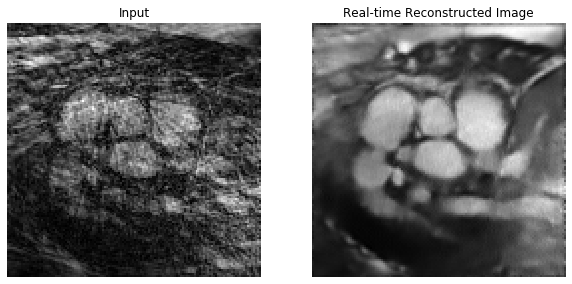

In [11]:
plt.figure(1, figsize=(10,10))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input')
plt.imshow(input_data[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Real-time Reconstructed Image')
plt.imshow(prediction[0, :, :, 0], cmap='gray')


plt.savefig('./images/docker_prediction_{model}.jpg'.format(model=model))

# Compare different UNets

### UNet2D2D

In [12]:
# Call when the docker image is setup
model = 'UNet2D2D'
API = "http://localhost:8501/v1/models/{model}:predict".format(model=model)
data = json.dumps({"instances": input_data.tolist()})
response = requests.post(API, data=data)
print("The average time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))
prediction_2d2d = np.array(response.json()['predictions'])

The average time taken for each image is 0.1725556s


### UNet2D1D

In [13]:
# Call when the docker image is setup
model = 'UNet2D1D'
API = "http://localhost:8501/v1/models/{model}:predict".format(model=model)
data = json.dumps({"instances": input_data.tolist()})
response = requests.post(API, data=data)
print("The average time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))
prediction_2d1d = np.array(response.json()['predictions'])

The average time taken for each image is 0.53887s


### UNet3D

In [14]:
# Call when the docker image is setup
model = 'UNet3D'
API = "http://localhost:8501/v1/models/{model}:predict".format(model=model)
data = json.dumps({"instances": input_data.tolist()})
response = requests.post(API, data=data)
print("The average time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))
prediction_3d = np.array(response.json()['predictions'])

The average time taken for each image is 0.7656615s


### UNet3D_old

In [15]:
# Call when the docker image is setup
model = 'UNet3D_old'
API = "http://localhost:8501/v1/models/{model}:predict".format(model=model)
data = json.dumps({"instances": input_data.tolist()})
response = requests.post(API, data=data)
print("The average time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))
prediction_3d_old = np.array(response.json()['predictions'])

The average time taken for each image is 0.8774094s


## Plot the reconstructed images

In [17]:
import pickle

In [18]:
docker_prediction_result = {'UNet2D2D': prediction_2d2d, 'UNet2D1D': prediction_2d1d, 'UNet3D': prediction_3d, 'UNet3D_old': prediction_3d_old}

In [19]:
with open('docker_prediction_result.pkl', 'wb') as f:
    pickle.dump(docker_prediction_result, f)

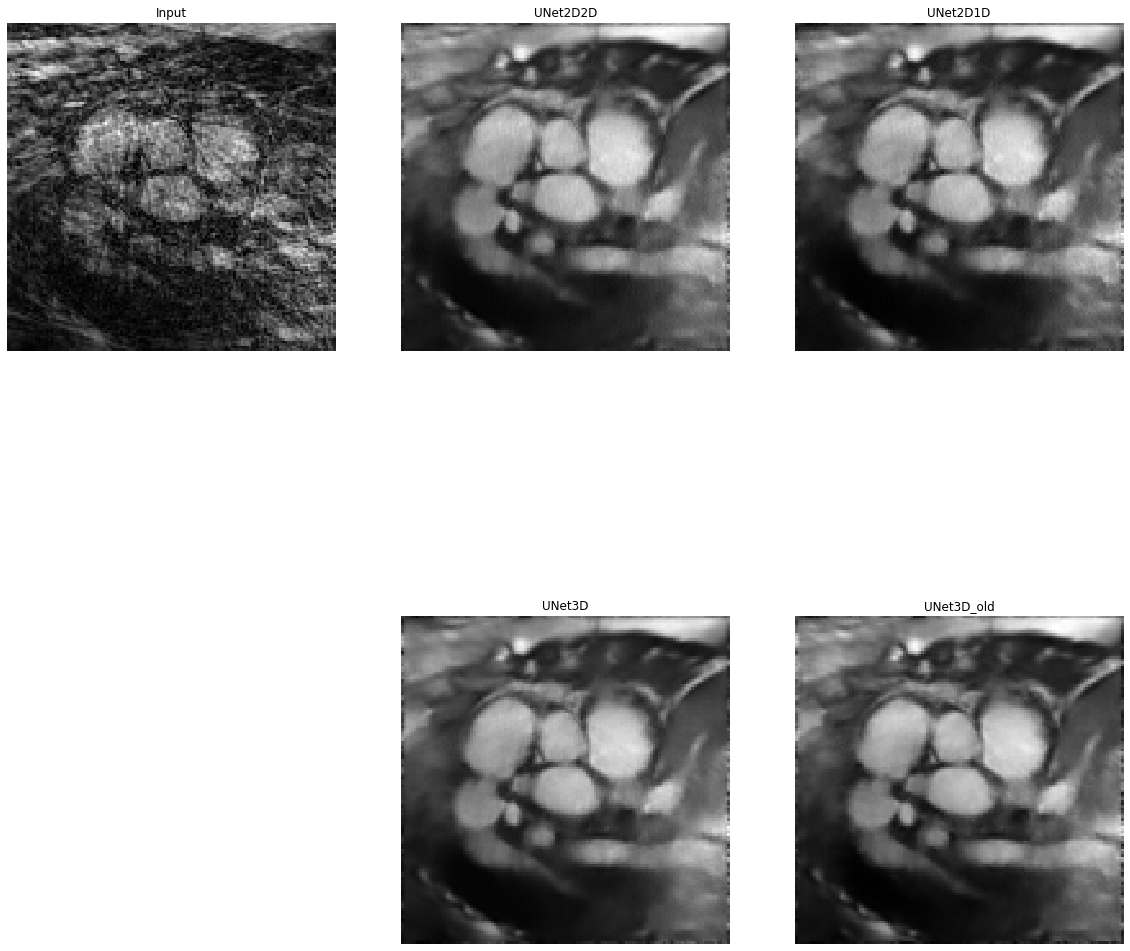

In [23]:
plt.figure(1, figsize=(20,20))


plt.subplot(2, 3, 1)
plt.axis('off')
plt.title('Input')
plt.imshow(input_data[0, :, :, 0], cmap='gray')

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title('UNet2D2D')
plt.imshow(prediction_2d2d[0, :, :, 0], cmap='gray')

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title('UNet2D1D')
plt.imshow(prediction_2d1d[0, :, :, 0], cmap='gray')

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title('UNet3D')
plt.imshow(prediction_3d[0, :, :, 0], cmap='gray')

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title('UNet3D_old')
plt.imshow(prediction_3d_old[0, :, :, 0], cmap='gray')

plt.savefig('./images/docker_prediction_all.jpg'.format(model=model), bbox_inches='tight')